# Projektarbeit: Epidemic Spread Modeling with Agent Based Model

885941 Heehwan Soul, 923029 Hajin Suh

## Contents
1. About agent-based model(ABM)
2. Parameters for the simulations 
3. Simulation with basic social model
4. Simulating with social network
5. Simulating with social network and a condition of 'Quarantine'
6. Simulating with basic social model and a regulation by government
    - Simulation with the regulation by government after 7 days of the start date
    - Parameter study: depending on when the regulation starts

## 1. About agent-based model(ABM)

![ABM Illustration](ABM_illustration.png)

source: Hiroki Sayama, Introduction to the Modeling and Analysis of Complex Systems, 2015, Binghamton University, SUNY

### The biological states(total 7):

0. Unexposed
1. Asymptomatic but infected/contagious
2. Symptomatic and contagious
3. Symptomatic and not contagious
4. Post-COVID Immune
5. Naturally immune (will not contract)
6. Death

![The network of the biological states](network_biological_states.png)

### Variables of diesease(covid)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import abm # agent based model

transitionMatrix = abm.Agent.transitionMatrix() # it shows the posibility to transfer from the state(row) to the state(column)
minimalTime = abm.Agent.minimalTime() # it shows the minimal time of each state
maximalTime = abm.Agent.maximalTime() # it shows the maximal time of each state

print("the matrix of transition: ")
print(transitionMatrix)
print("the array of minimal time of each state: ")
print(minimalTime)
print("the array of maximal time of each state: ")
print(maximalTime)

the matrix of transition: 
[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.5  0.   0.5  0.   0.  ]
 [0.   0.   0.   0.95 0.   0.   0.05]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]
the array of minimal time of each state: 
[1 3 3 1 1 1 1]
the array of maximal time of each state: 
[ 1 10  8  7  1  1  1]


## 2. Parameters for the simulations 

In [21]:
# common parameters for the simulations with basic social model and with social network
numAgents = 500
naturalImmunity = 0.01 # 1% naturally immune
numInteractions = 10 # how many interactions per day per agent on average
numDays = 50
contagionProb = 0.1 # normal contagion probability
numInfected = 3

# parameters only for the simulation with basic social model
numSimulations_basic = 100

# parameters only for the simulation with social network
numSimulations_SN = 5 # we make these two variables(numSimulations_basic, numSimulations_SN) separately
                        # because simulation using soical network takes too long
sampleFromNetwork = 0.98 # we can choose how much this social network effects on whom an agent meet
                            # within the soical network or totally randomly
socialNetwork = abm.socialNetwork(500, 0.015) # make a random social network

## 3. Simulation with basic social model

Anyone can interact with anyone - not realistic

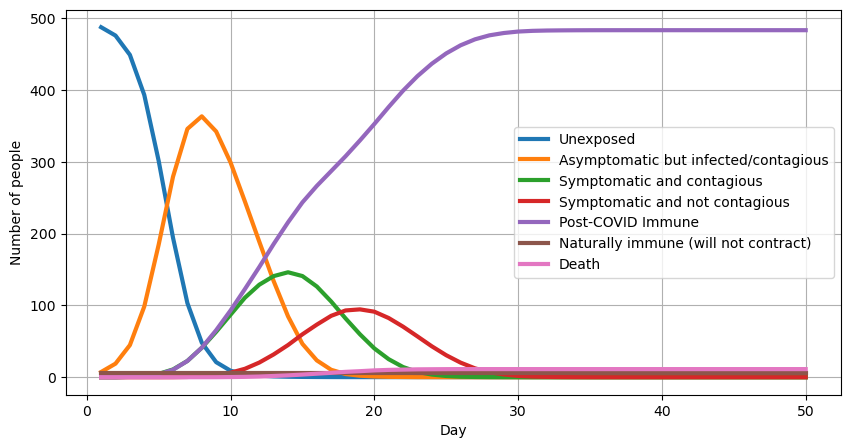

In [19]:
sum_result_basic = np.empty([numDays, abm.Agent.numberStates()])
for i in range (numSimulations_basic):
    result = abm.simulation_basic(numAgents, naturalImmunity, numInteractions, numDays, contagionProb, numInfected)
    sum_result_basic += result

# Get mean values of these simulations
mean_result_basic = sum_result_basic/numSimulations_basic

# plot
plt.figure(figsize=(10,5))
day = np.arange(1, 1+numDays)
plt.plot(day, mean_result_basic[:,0], label='Unexposed', linewidth=3)
plt.plot(day, mean_result_basic[:,1], label='Asymptomatic but infected/contagious', linewidth=3)
plt.plot(day, mean_result_basic[:,2], label='Symptomatic and contagious', linewidth=3)
plt.plot(day, mean_result_basic[:,3], label='Symptomatic and not contagious', linewidth=3)
plt.plot(day, mean_result_basic[:,4], label='Post-COVID Immune', linewidth=3)
plt.plot(day, mean_result_basic[:,5], label='Naturally immune (will not contract)', linewidth=3)
plt.plot(day, mean_result_basic[:,6], label='Death', linewidth=3)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.grid()
plt.legend()

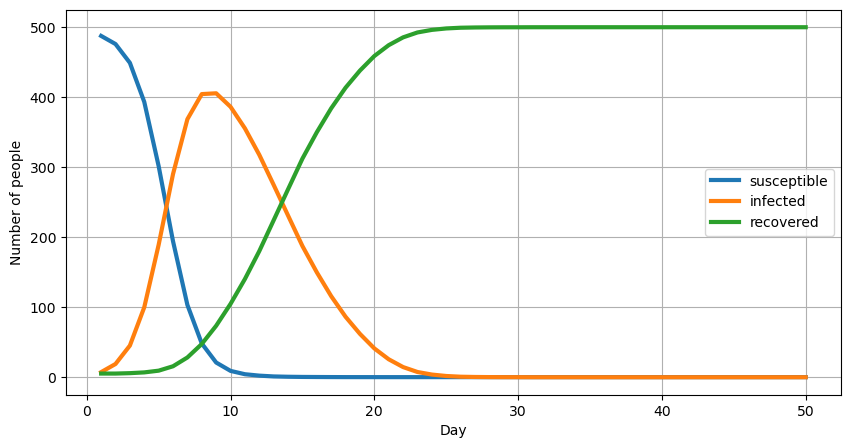

In [20]:
# plot SIR
plt.figure(figsize=(10,5))
day = np.arange(1, 1+numDays)
plt.plot(day, mean_result_basic[:,0], label='susceptible', linewidth=3)
plt.plot(day, mean_result_basic[:,1] + mean_result_basic[:,2], label='infected', linewidth=3)
plt.plot(day, mean_result_basic[:,3] + mean_result_basic[:,4] + mean_result_basic[:,5] + mean_result_basic[:,6], label='recovered', linewidth=3)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.grid()
plt.legend()

## 4. Simulating with social network

### Example of creating a social network

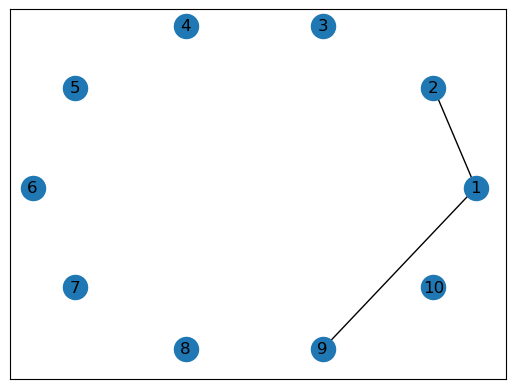

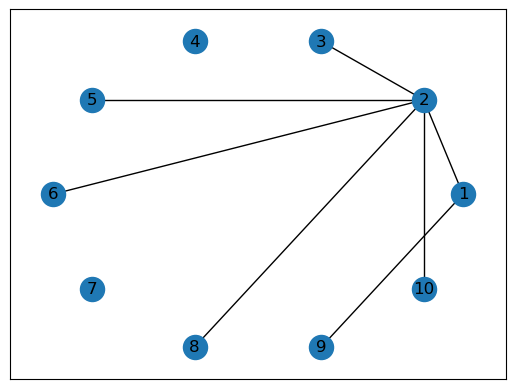

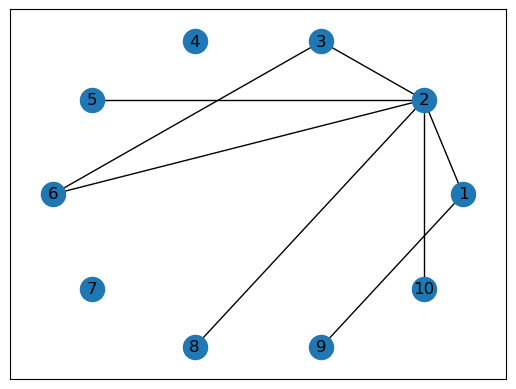

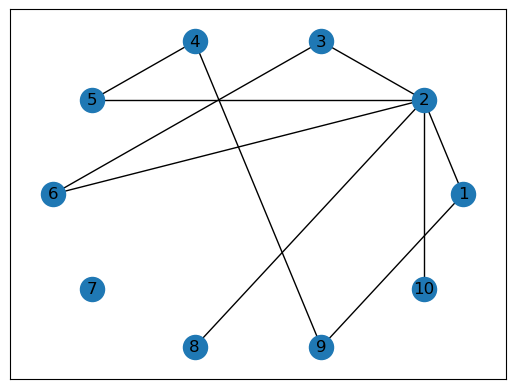

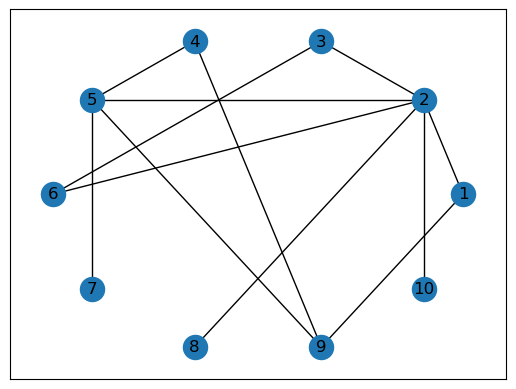

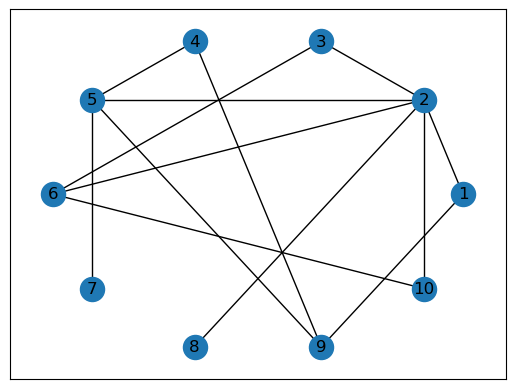

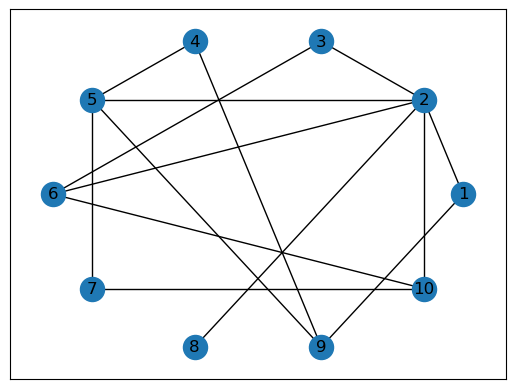

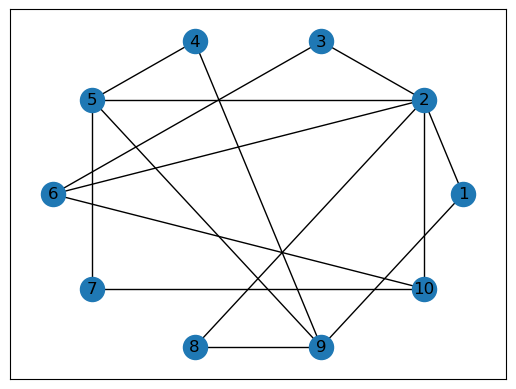

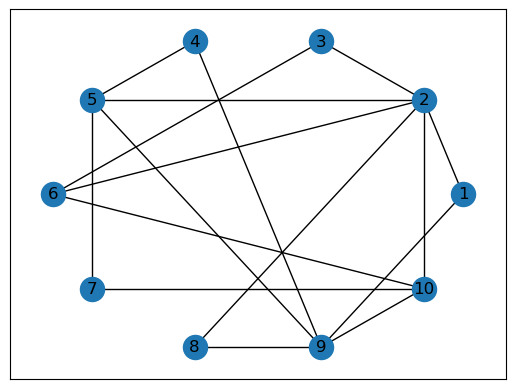

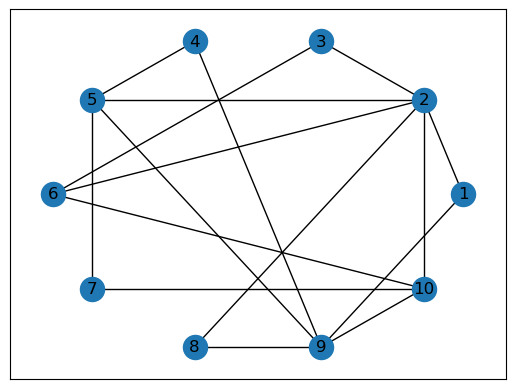

[(1, 2), (2, 6), (3, 2), (4, 2), (5, 4), (6, 3), (7, 2), (8, 2), (9, 5), (10, 4)]


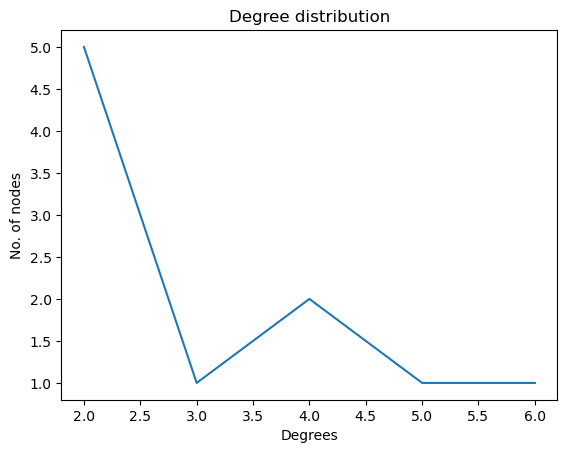

In [5]:
# source: https://www.geeksforgeeks.org/implementation-of-erdos-renyi-model-on-social-networks/
# Implementation of Erdos-Renyi Model on a Social Network


# Import Required modules
import networkx as nx
import matplotlib.pyplot as plt
import random


# Distribution graph for Erdos_Renyi model
def distribution_graph(g):
	print(nx.degree(g))
	all_node_degree = list(dict((nx.degree(g))).values())

	unique_degree = list(set(all_node_degree))
	unique_degree.sort()
	nodes_with_degree = []
	for i in unique_degree:
		nodes_with_degree.append(all_node_degree.count(i))

	plt.plot(unique_degree, nodes_with_degree)
	plt.xlabel("Degrees")
	plt.ylabel("No. of nodes")
	plt.title("Degree distribution")
	plt.show()

		
# Take N number of nodes from user
N = 10


# Take P probability value for edges
P = 0.4


# Create an empty graph object
g = nx.Graph()


# Adding nodes
g.add_nodes_from(range(1, N + 1))


# Add edges to the graph randomly.
for i in g.nodes():
	for j in g.nodes():
		if (i < j):
			
			# Take random number R.
			R = random.random()
			
			# Check if R<P add the edge to the graph else ignore.
			if (R < P):
				g.add_edge(i, j)
	pos = nx.circular_layout(g)
	
	# Display the social network
	nx.draw_networkx(g, pos, with_labels=1)
	plt.show()

# Display connection between nodes	
distribution_graph(g)


### Simulation with the Erdos-Renyi Model on a Social Network

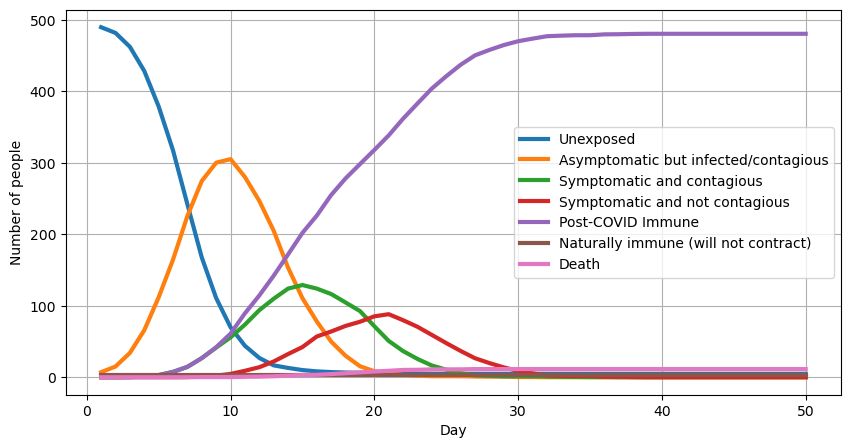

In [24]:
sum_result_SN = np.empty([numDays, abm.Agent.numberStates()])
for i in range (numSimulations_SN):
    result = abm.simulation_social_network(numAgents, naturalImmunity, numInteractions, numDays, contagionProb, numInfected, socialNetwork, sampleFromNetwork)
    sum_result_SN += result

# Get mean values of these simulations
mean_result_SN = sum_result_SN/numSimulations_SN

# plot
plt.figure(figsize=(10,5))
day = np.arange(1, 1+numDays)
plt.plot(day, mean_result_SN[:,0], label='Unexposed', linewidth=3)
plt.plot(day, mean_result_SN[:,1], label='Asymptomatic but infected/contagious', linewidth=3)
plt.plot(day, mean_result_SN[:,2], label='Symptomatic and contagious', linewidth=3)
plt.plot(day, mean_result_SN[:,3], label='Symptomatic and not contagious', linewidth=3)
plt.plot(day, mean_result_SN[:,4], label='Post-COVID Immune', linewidth=3)
plt.plot(day, mean_result_SN[:,5], label='Naturally immune (will not contract)', linewidth=3)
plt.plot(day, mean_result_SN[:,6], label='Death', linewidth=3)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.grid()
plt.legend()


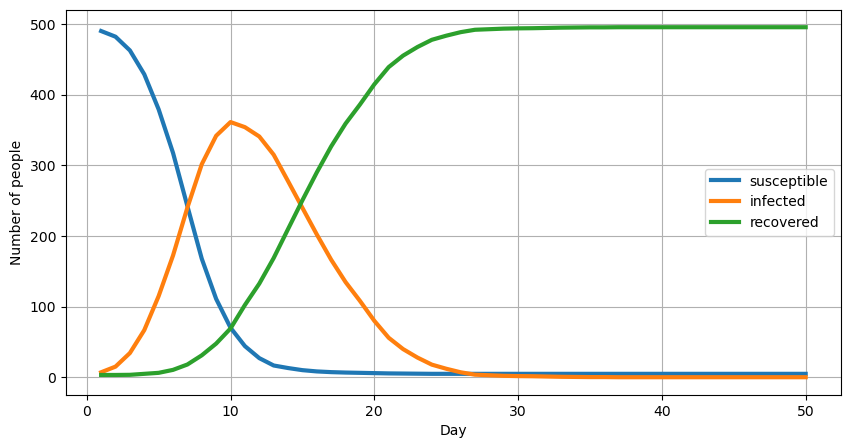

In [25]:
# plot SIR
plt.figure(figsize=(10,5))
day = np.arange(1, 1+numDays)
plt.plot(day, mean_result_SN[:,0], label='susceptible', linewidth=3)
plt.plot(day, mean_result_SN[:,1] + mean_result_SN[:,2], label='infected', linewidth=3)
plt.plot(day, mean_result_SN[:,3] + mean_result_SN[:,4] + mean_result_SN[:,5] + mean_result_SN[:,6], label='recovered', linewidth=3)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.grid()
plt.legend()

## 5. Simulating with social network and a condition of 'Quarantine'

### Condition: The people who have symptoms cannot meet other people

- The code without this condition:

        if((agent1.biostate==1 or agent1.biostate==2 ) and agent2.biostate==0 and np.random.uniform(low=0, high=1, size=1)[0]<contagionProb):
                agent2.setAgentState(1) ## infected!
                
- The code with this condition:
        
        if((agent1.biostate==1) and agent2.biostate==0 and np.random.uniform(low=0, high=1, size=1)[0]<contagionProb):
                agent2.setAgentState(1) ## infected!

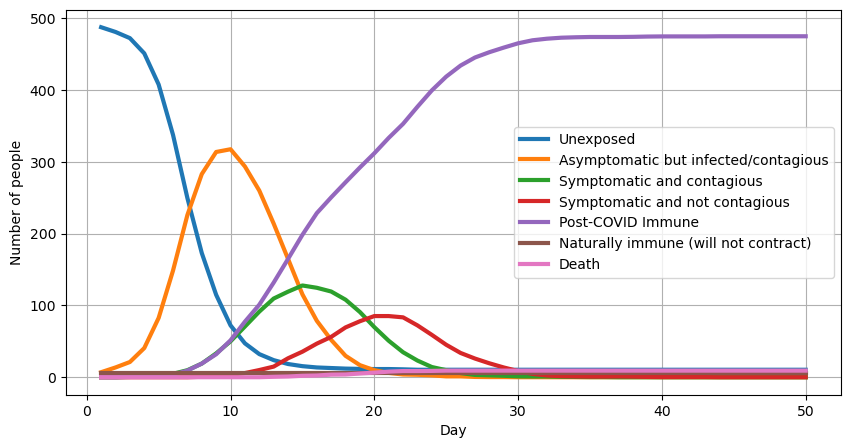

In [26]:
sum_result_SN_quaran = np.empty([numDays, abm.Agent.numberStates()])
for i in range (numSimulations_SN):
    result = abm.simulation_social_network_quarantine(numAgents, naturalImmunity, numInteractions, numDays, contagionProb, numInfected, socialNetwork, sampleFromNetwork)
    sum_result_SN_quaran += result

# Get mean values of these simulations
mean_result_SN_quaran= sum_result_SN_quaran/numSimulations_SN

# plot
plt.figure(figsize=(10,5))
day = np.arange(1, 1+numDays)
plt.plot(day, mean_result_SN_quaran[:,0], label='Unexposed', linewidth=3)
plt.plot(day, mean_result_SN_quaran[:,1], label='Asymptomatic but infected/contagious', linewidth=3)
plt.plot(day, mean_result_SN_quaran[:,2], label='Symptomatic and contagious', linewidth=3)
plt.plot(day, mean_result_SN_quaran[:,3], label='Symptomatic and not contagious', linewidth=3)
plt.plot(day, mean_result_SN_quaran[:,4], label='Post-COVID Immune', linewidth=3)
plt.plot(day, mean_result_SN_quaran[:,5], label='Naturally immune (will not contract)', linewidth=3)
plt.plot(day, mean_result_SN_quaran[:,6], label='Death', linewidth=3)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.grid()
plt.legend()

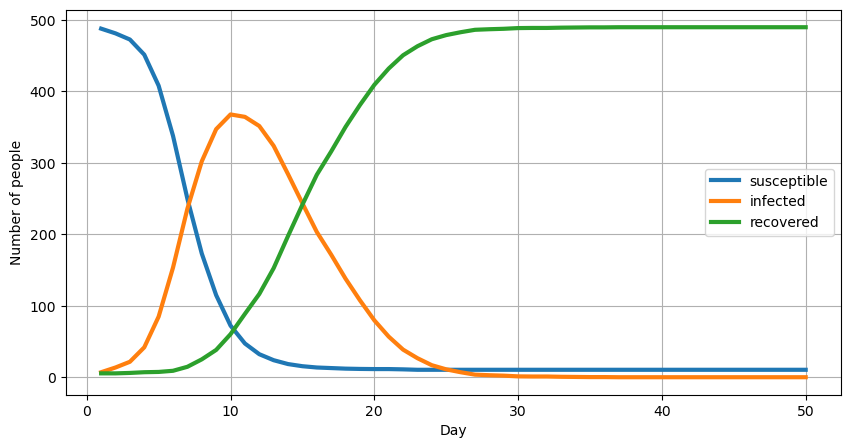

In [27]:
# plot SIR
plt.figure(figsize=(10,5))
day = np.arange(1, 1+numDays)
plt.plot(day, mean_result_SN_quaran[:,0], label='susceptible', linewidth=3)
plt.plot(day, mean_result_SN_quaran[:,1] + mean_result_SN_quaran[:,2], label='infected', linewidth=3)
plt.plot(day, mean_result_SN_quaran[:,3] + mean_result_SN_quaran[:,4] + mean_result_SN_quaran[:,5] + mean_result_SN_quaran[:,6], label='recovered', linewidth=3)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.grid()
plt.legend()

### Interpretaion

There is no significant difference between the simulations with the condition(Quarantine) and without the coundition. That is a interesting result. I could have not found any error of my code yet. Maybe we can think about it deeper.

## 6. Simulating with basic social model and a regulation by government
1. We decided to use basic social model here, because simulation with the social network takes too much time.
2. We also decided not to apply quantine here to see the effect of the regulation well.

#### Regulation: People cannot meet people as a member of a group, which consists of more than 4 people

    -> Assumption: Each person meets 3 people a day

### Simulation with basic social model and this assumption after 7 days of the start date

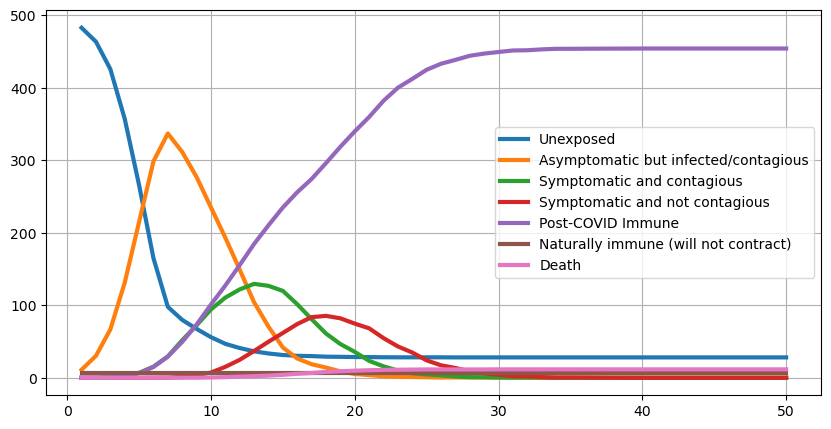

In [11]:
# the number of interactions
numInteractions_before = 10 # 10 Interactions
numInteractions_after = 3 # 3 Interactions

sum_result_basic_reg_7d = np.empty([numDays, abm.Agent.numberStates()])
for i in range (numSimulations_basic):
    result = abm.simulation_basic_reg_after7days(numAgents, naturalImmunity, numInteractions_before, numInteractions_after, numDays, contagionProb, numInfected)
    sum_result_basic_reg_7d += result

# Get mean values of these simulations
mean_result_basic_reg_7d = sum_result_basic_reg_7d/numSimulations_basic

# plot
plt.figure(figsize=(10,5))
day = np.arange(1, 1+numDays)
plt.plot(day, mean_result_basic_reg_7d[:,0], label='Unexposed', linewidth=3)
plt.plot(day, mean_result_basic_reg_7d[:,1], label='Asymptomatic but infected/contagious', linewidth=3)
plt.plot(day, mean_result_basic_reg_7d[:,2], label='Symptomatic and contagious', linewidth=3)
plt.plot(day, mean_result_basic_reg_7d[:,3], label='Symptomatic and not contagious', linewidth=3)
plt.plot(day, mean_result_basic_reg_7d[:,4], label='Post-COVID Immune', linewidth=3)
plt.plot(day, mean_result_basic_reg_7d[:,5], label='Naturally immune (will not contract)', linewidth=3)
plt.plot(day, mean_result_basic_reg_7d[:,6], label='Death', linewidth=3)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.grid()
plt.legend()

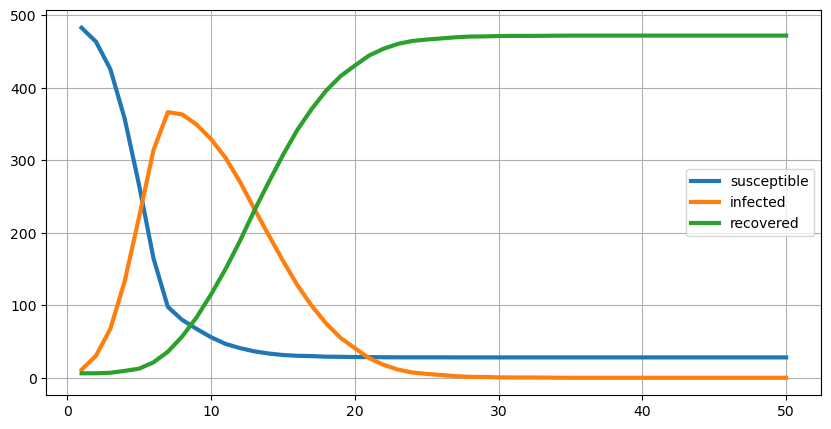

In [12]:
# plot SIR
plt.figure(figsize=(10,5))
day = np.arange(1, 1+numDays)
plt.plot(day, mean_result_basic_reg_7d[:,0], label='susceptible', linewidth=3)
plt.plot(day, mean_result_basic_reg_7d[:,1] + mean_result_basic_reg_7d[:,2], label='infected', linewidth=3)
plt.plot(day, mean_result_basic_reg_7d[:,3] + mean_result_basic_reg_7d[:,4] + mean_result_basic_reg_7d[:,5] + mean_result_basic_reg_7d[:,6], label='recovered', linewidth=3)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.grid()
plt.legend()

### Parameter study: depending on when the regulation starts

In [28]:
regulationStartDays = np.array([15,12,9,8,7,6,3])
length_regulationStartDays = np.size(regulationStartDays)

mean_result_list = []

'''
sum_result_basic_reg_0 = np.empty([numDays, abm.Agent.numberStates()])
sum_result_basic_reg_1 = np.empty([numDays, abm.Agent.numberStates()])
sum_result_basic_reg_2 = np.empty([numDays, abm.Agent.numberStates()])
sum_result_basic_reg_3 = np.empty([numDays, abm.Agent.numberStates()])
sum_result_basic_reg_4 = np.empty([numDays, abm.Agent.numberStates()])
'''

sum_result_basic_reg = np.empty([numDays, abm.Agent.numberStates()])
mean_result_basic_reg = np.empty([numDays, abm.Agent.numberStates()])

for i in range(length_regulationStartDays):
    for j in range (numSimulations_basic):
        result = abm.simulation_basic_reg(numAgents, naturalImmunity, regulationStartDays[i],numInteractions_before, numInteractions_after, numDays, contagionProb, numInfected)
        sum_result_basic_reg += result
    # Get mean values of these simulations
    mean_result_basic_reg = sum_result_basic_reg/numSimulations_basic
    mean_result_list.append(mean_result_basic_reg)
    # set the variables empty again
    sum_result_basic_reg = np.empty([numDays, abm.Agent.numberStates()])
    mean_result_basic_reg = np.empty([numDays, abm.Agent.numberStates()])




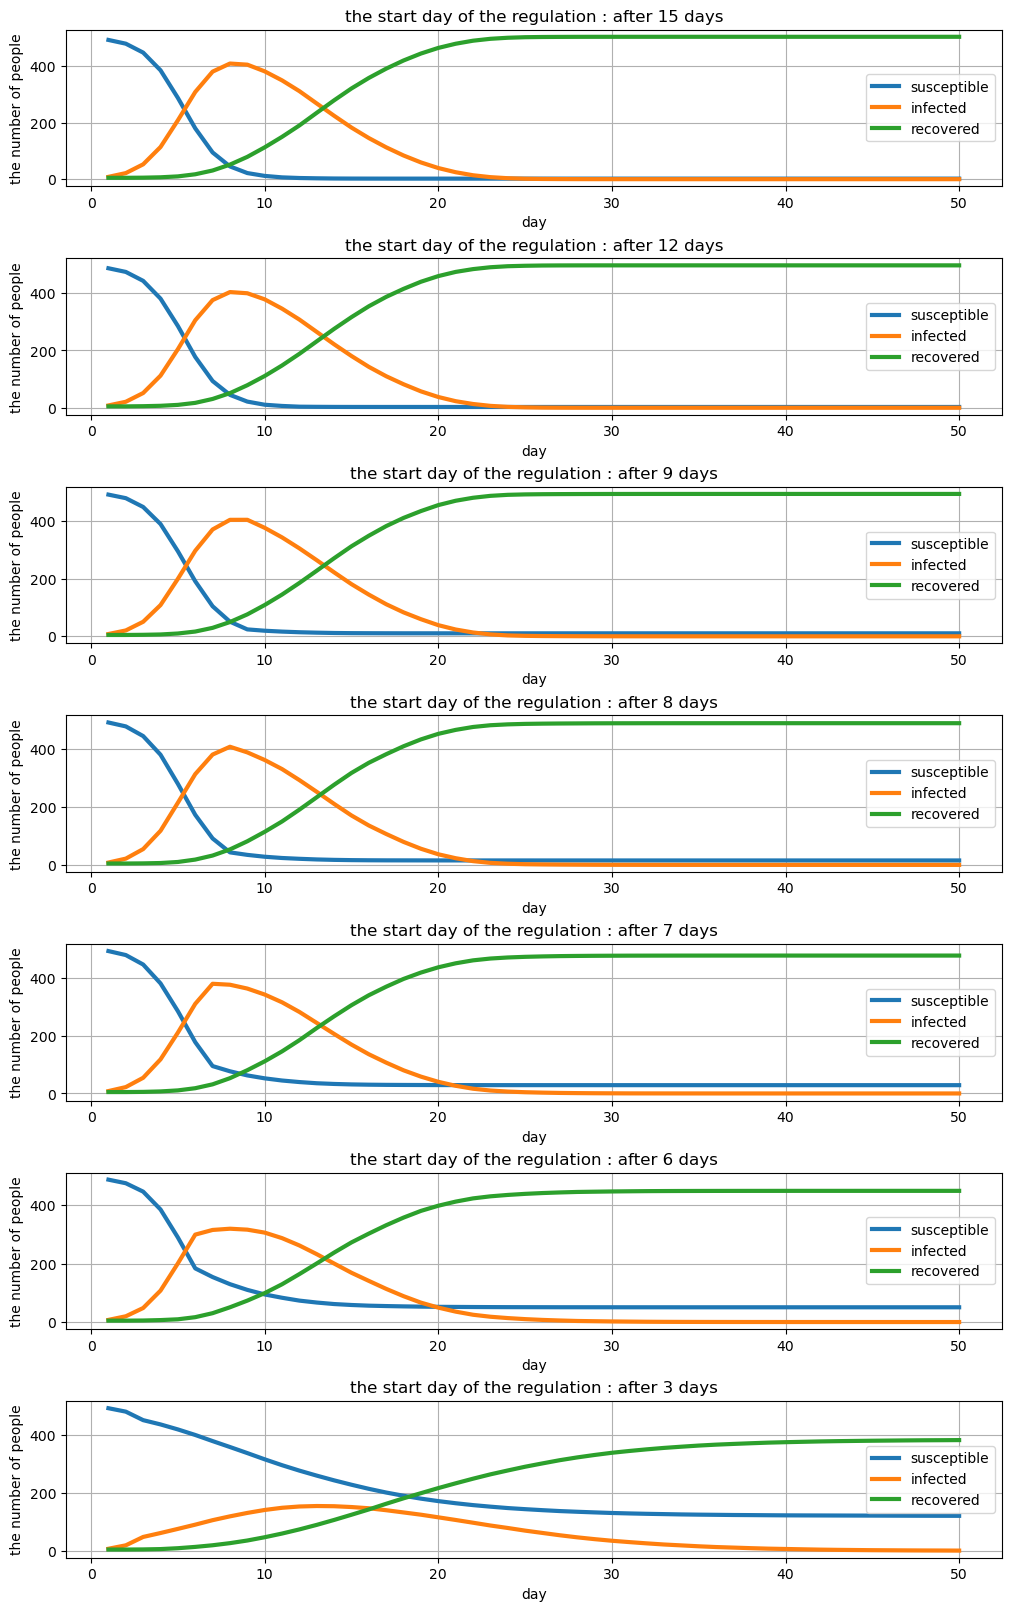

In [29]:
## Visualisierung

fig, ax = plt.subplots(length_regulationStartDays, figsize=(10,16), constrained_layout = True)
day = np.arange(1, 1+numDays)

for i in range(length_regulationStartDays):
    
    ax[i].plot(day, mean_result_list[i][:,0], label='susceptible', linewidth=3)
    ax[i].plot(day, mean_result_list[i][:,1] + mean_result_list[i][:,2], label='infected', linewidth=3)
    ax[i].plot(day, mean_result_list[i][:,3] + mean_result_list[i][:,4] + mean_result_list[i][:,5] + mean_result_list[i][:,6], label='recovered', linewidth=3)
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xlabel('day')
    ax[i].set_ylabel('the number of people')
    ax[i].set_title('the start day of the regulation : after {} days'.format(regulationStartDays[i]))

#### Interpretation
When we see the last 2 graphs(values of parameter: 6, 3), we can easily find that the regulation works. Especially when the value of the parameter is 3, the effect of the regulation is huge. 
When we compare the first 5 graphs(values of parameter: 15, 12, 9, 8, 7) to the graph of (b) in Figure 19, there is no significant difference. It means that the regulation does not work well, when the government starts to enforce the regulation after 7 days. It is interesting that the regulation works really well, when the value of parameter is 6. We thought it is because the regulation is enforced before the number of infected people reaches a peak. That is the reason why one day earlier makes a big difference. It is of course hard to say that one day earlier makes a big difference in the real world, because only 500 agents are created in these simulations. But we can at least say that the government needs to enforce the regulation before the number of infected people reaches a peak to make the spread of COVID-19 slow down. We can also conclude that the earlier the regulation is enforced before the peak, the dramatically slower COVID-19 spreads.